For a pendulum, the Lagrangian is

$\begin{align}
  \mathcal{L} = \frac12 m L^2 \dot\phi^2 - mgL(1 - \cos\phi)
\end{align}$

which tells us that the generalized momentum is

$\begin{align}
   \frac{\partial\mathcal{L}}{\partial \dot\phi} = m L^2 \dot\phi \equiv p_\phi
   \;.
\end{align}$

We can invert this equation to find $\dot\phi = p_\phi / m L^2$.
Constructing the Hamiltonian by Legendre transformation we find 

$\begin{align}
  \mathcal{H} &= \dot\phi p_\phi  - \mathcal{L} \\
              &= \frac{p_\phi^2}{m L^2} - \frac12 m L^2 \dot\phi^2 + mgL(1 - \cos\phi) \\
              &= \frac{p_\phi^2}{2 m L^2} + mgL(1 - \cos\phi)
              \;.
\end{align}$

Thus $\mathcal{H}$ is simply $T + V$.  Hamilton's equations are

$\begin{align}
  \dot\phi &= \frac{\partial\mathcal{H}}{\partial p_\phi} = \frac{p_\phi}{m L^2} \\
  \dot p_\phi &= -\frac{\partial\mathcal{H}}{\partial \phi} = -mgL \sin\phi 
  \;.
\end{align}$

fix latex code

The following is the for final
Total potential energy of system

$\begin{align}
   U(\phi1,\phi2)=(m_1+m_2)gL_1(1-\cos\phi_1)+m_2gL_2(1-\cos(\phi_2))
  \;.
\end{align}$

total kinetic energy of the system

$\begin{align}
T(\phi_1,\phi_2)=1/2(m_1+m_2)L_1^2 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi) + 1/2 m_2 L_2^2\dot\phi_1^2
\;.
\end{align}$

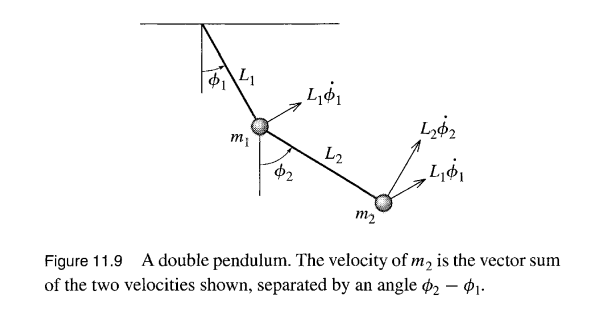

In [15]:
%matplotlib inline

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [16]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

In [24]:
#fix the following class accordingly
#1. assuming the pole has no mass
#2. two poles are in equal length

class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the simple pendulum1
    L2:  float(tbd)
        length of the simple pendulum1
        
    g : float
        gravitational acceleration at the earth's surface
    omega1_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    omega2_0:float(tbd)
        let it be zero
    mass1 : float
        mass of pendulum1
    mass2 : float(tbd)
        mass of pendulum2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1., mass1=1.,mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            #A 2-component vector with y[0] = theta1(t) and y[1] = dtheta1/dt=z1
             y[2] = theta2(t) and y[3] = dtheta2/dt=z2
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.m2 * self.g * np.sin(theta2) * c \
                 - self.m2 * s *(self.L1 * z1 ** 2 * c + self.L2 * z2**2) \
                 - (self.m1 + self.m2) * self.g * np.sin(theta1)) \
                 / self.L1 / denom
        
        theta2_dot = z2
        
        z2_dot = (( self.m1 + self.m2) * (self.L1 * z1**2 *s \
                - self.g * np.sin(theta2) + self.g * np.sin(theta1)* c) \
                + self.m2 *self.L2 * z2**2 * s * c) \
                / self.L2 / denom
        
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
        
        
        #return [y[1], -self.omega_0**2 * np.sin(y[0]) ]
    
    #def solve_ode(self, t_pts, phi_0, phi_dot_0, 
                  #abserr=1.0e-9, relerr=1.0e-9):
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0,theta2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = solve_ivp(self.dy_dt,(t_pts[0], t_pts[-1]),
                             y,t_eval=t_pts,
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y
        
        return theta1, theta1_dot, theta2, theta2_dot
        #y = [phi_0, phi_dot_0] 
        #solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
        #                     y, t_eval=t_pts, 
        #                     atol=abserr, rtol=relerr)
        #phi, phi_dot = solution.y

        #return phi, phi_dot
    
    def calc_E(y):
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T+V

In [25]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [26]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [27]:
# Labels for individual plot axes
#phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
#phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
#state_space_labels = (r'$\phi$', r'$d\phi/dt$')
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
dp1 = DoublePendulum(L1=L1,L2=L2,mass1 = mass1,  mass2=mass2, g=g)

In [28]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)



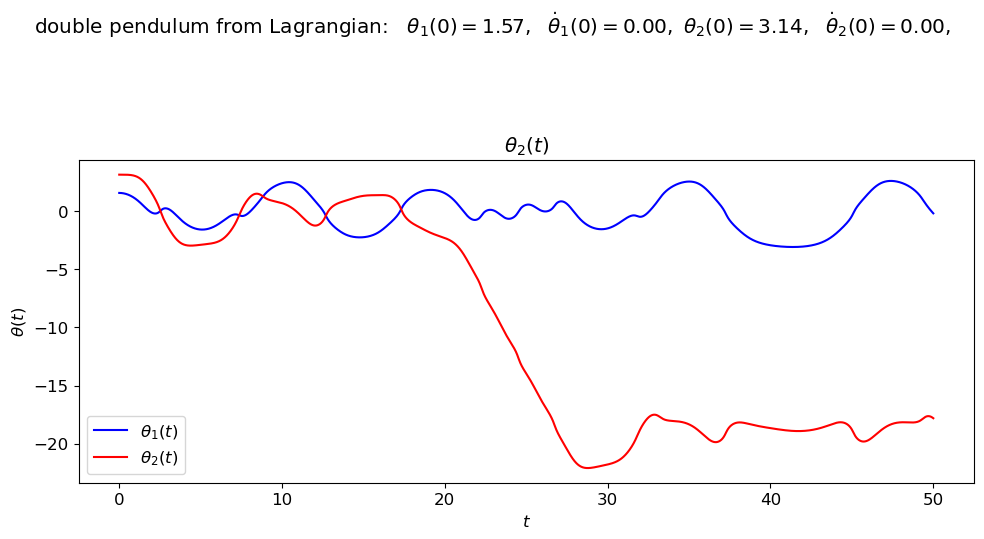

In [30]:
#start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title=r'$\theta_2(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange.png', bbox_inches='tight')

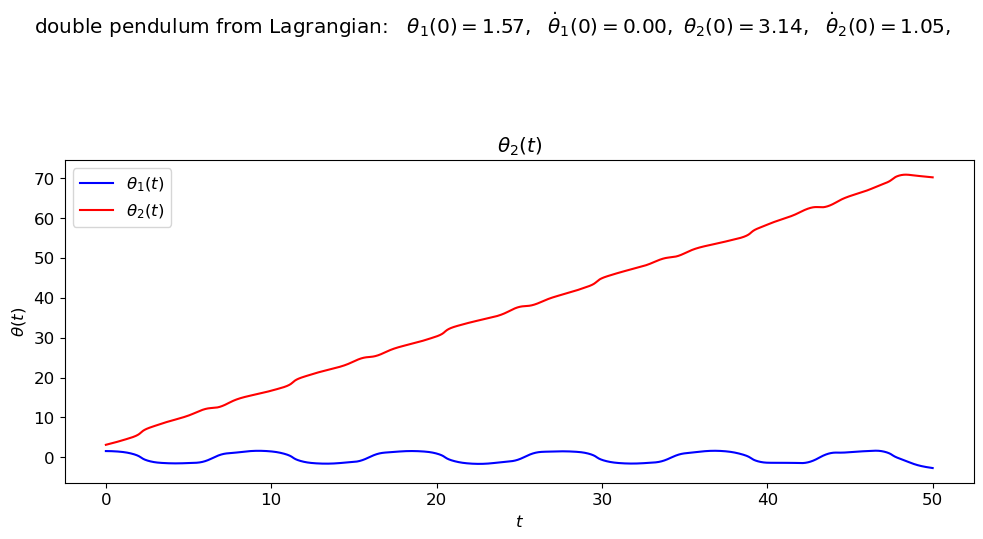

In [31]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = np.pi / 3.

theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)
#start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title=r'$\theta_2(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange.png', bbox_inches='tight')

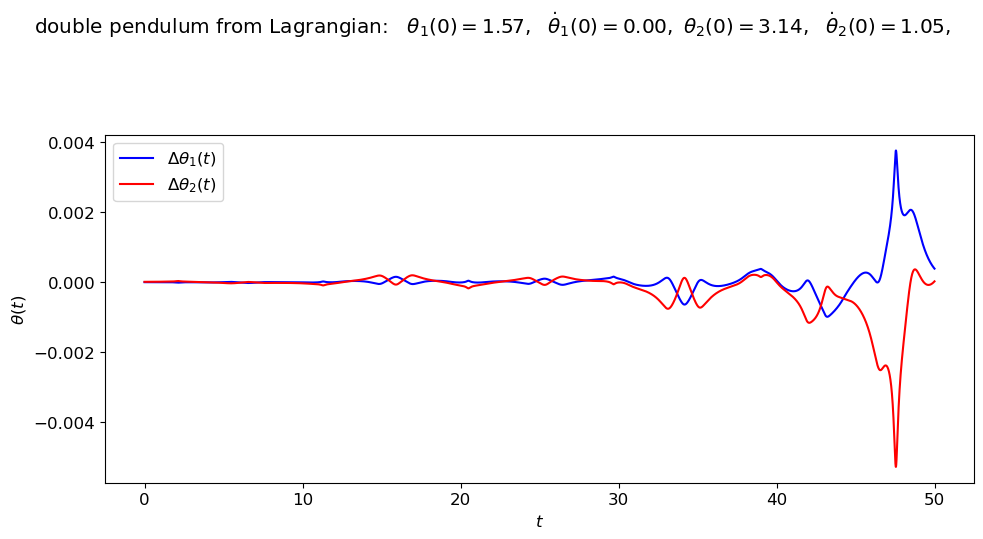

In [34]:
theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)

theta1b, thetab_dot, theta2b, theta2b_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0-0.00001,theta2_dot_0)
#start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop]-theta1b[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\Delta\theta_1(t)$', 
            #title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop]-theta2b[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\Delta\theta_2(t)$', 
            #title=r'$\theta_2(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_2.png', bbox_inches='tight')

A small change of initial condition leads to completly different delta value. So it is chaotic.

In [36]:
#animation
from matplotlib import animation, rc
from IPython.display import HTML

In [37]:
def xy_coordx(x0,y0, theta, L):
    
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x,y

In [ ]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min


fig_anim = plt.figure(figsize=(5,5), num='double pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.

x0, y0 =0. , 0.
pt0_anim, = ax_anim.plot(x0, y0, 'o', markersize = 6, color='black')

x1, y1 = xy_coordx(x0, y0, theta1[0],dp1.L1)

#-----------------------------fixed following TBD 12:52

u_triangular_1.u_start()
line_anim, = ax_anim.plot(x_pts, 
                          u_triangular_1.u_wave_at_t(t_min), 
                          color='blue', lw=2)

fig_anim.tight_layout()

In [ ]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_triangular_1.u_wave_at_t(t)

    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    #return line_anim   # this is needed for blit=True to work

In [ ]:
frame_interval = 80.  # time between frames
frame_number = 201    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=False,
                               repeat=False)

In [ ]:
HTML(anim.to_jshtml()) 